<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/0304_Week1_HW_HOM_ModelTraining_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

핸즈온머신러닝 4장. 모델훈련(1)

## 4.1 선형회귀

📈 4-1 선형 회귀 모델의 예측

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

* $\hat{y}$ : 예측값
* $x_i$ : $i$번째 특성값
* $\theta_j$ : $j$번째 모델 파라미터 (편향(절편) $\theta_0$, 가중치 $\theta_1, \theta_2...$)

📈 4-2 선형 회귀 모델의 예측(벡터 형태)

$\hat{y} = h_\theta(X) = \theta\cdot X = \theta^TX$
* **$\theta$** 는 편향 $\theta_0$과 $\theta_1$에서 $\theta_n$까지의 특성 가충치를 담은 모델의 파라미터 벡터
* **$x$**는 $x_0$ $x_n$까지 담은 샘플의 특성 벡터. $x_0$는 항상 1.
* $h_\theta(X)$는 모델 파라미터 $\theta$를 사용한 가설 함수.

모델을 훈련시킨다 : 모델 파라미터 설정



📈 4-3 선형 회귀 모델의 MSE 비용 함수

$MSE(X,h_\theta(X)) = \frac{1}{m}Σ_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})^2$


### 4.1.1 정규방정식

비용함수를 최소화하기 위한 $\theta$값을 찾기 위한 방법

📈 4-4 정규방정식

$\hat{\theta} = (X^TX)^{-1}X^Ty$

In [ ]:
# 선형 데이터 생성
import numpy as np
X = 2*np.random.rand(100,1) # shape : [100,1]
y = 4 + 3*X + np.random.rand(100,1) # 잡음 추가

In [ ]:
X_b = np.c_[np.ones((100,1)),X] # bias 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# np.linalg : NumPy의 선형대수(Linear Algebra) 모듈로, 행렬 연산과 관련된 다양한 기능을 제공

In [ ]:
theta_best

array([[4.43466222],
       [3.03092823]])

In [ ]:
X_new = np.array([[0],
                  [2]])

X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.43466222],
       [10.49651867]])

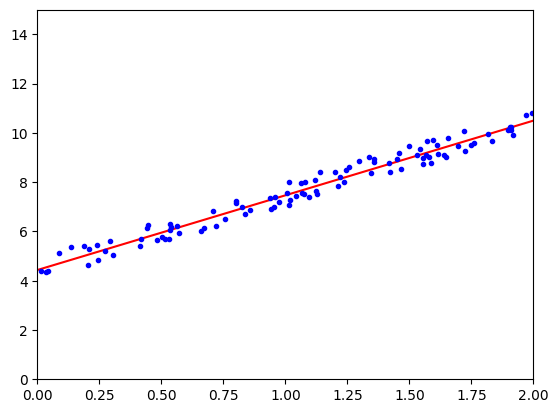

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
# 사이킷런에서 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.43466222] [[3.03092823]]
[[ 4.43466222]
 [10.49651867]]


LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 함.

$\hat{\theta} = X^+y$

$X^+$는 $X$의 유사역행렬

유사역행렬은 특잇값 분해(SVD)라 부르는 표준행렬분해 기법을 이용해 계산

아래 출처 : ChatGPT 👍

### ✅ 1. 특잇값 분해(SVD)란?
특잇값 분해(SVD)는 행렬 $X$를 세 개의 행렬 곱으로 분해하는 방식.

$$
X = U \Sigma V^T
$$

여기서:
- $U$ : **왼쪽 직교 행렬** ($m \times m$, 정규 직교 행렬)
- $\Sigma$ : **대각 행렬** ($m \times n$, 특잇값이 포함된 행렬)
- $V^T$ : **오른쪽 직교 행렬** ($n \times n$, 정규 직교 행렬의 전치)

행렬 $\Sigma$에는 **특잇값(singular values)**이 포함되며, 이는 차원 축소, 노이즈 제거 등의 역할을 함.

---

### ✅ 2. 유사역행렬 계산 과정

유사역행렬( $X^+$ )을 구하는 과정은 다음과 같음.

#### (1) 특잇값 분해 수행
주어진 행렬 $X$를 SVD로 분해.

$$
X = U \Sigma V^T
$$

#### (2) 작은 특잇값을 0으로 변환
특잇값 행렬 $\Sigma$에서 **일정 임곗값 이하의 값**을 0으로 변환하여 수치적으로 안정적인 계산을 수행.

$$
\sigma_i < \epsilon \quad \Rightarrow \quad \sigma_i = 0
$$

#### (3) 특잇값의 역수 계산
0이 아닌 모든 특잇값에 대해 역수를 취함.

$$
\Sigma^+ = \text{diag} \left( \frac{1}{\sigma_1}, \frac{1}{\sigma_2}, ..., \frac{1}{\sigma_r} \right)
$$

여기서 $r$은 0이 아닌 특잇값의 개수.

#### (4) 유사역행렬 계산
유사역행렬( $X^+$ )은 다음과 같이 계산됨.

$$
X^+ = V \Sigma^+ U^T
$$

---

### ✅ 3. 유사역행렬이 필요한 이유

보통 행렬 $X$의 역행렬이 존재한다면,

$$
X^{-1} X = I
$$

가 성립하여 해를 쉽게 구할 수 있습니다. 그러나 **역행렬이 존재하지 않는 경우**가 있음.

#### 🔹 (1) $X$가 정방행렬이 아니거나 $m < n$인 경우
- 만약 $X$의 행 개수 $m$이 열 개수 $n$보다 작다면($m < n$), $X$는 정방행렬이 아니므로 **정규 역행렬이 존재하지 않음**
- 이런 경우에도 **유사역행렬을 사용하면** 최소제곱해(least squares solution)를 구할 수 있음.

#### 🔹 (2) $X$가 특이행렬(singular matrix)인 경우
- 특이행렬이란 **열 벡터들이 선형 독립이 아닌 행렬**
- 즉, **열 중복 또는 0인 특잇값이 존재하면 역행렬을 구할 수 없음**
- 그러나 유사역행렬을 사용하면 **0이 아닌 특잇값만 사용하여 해를 구할 수 있음.**

---

### ✅ 4. 유사역행렬의 활용 예시

#### 🔹 (1) 최소제곱해 구하기
선형 방정식 $Xw = y$에서,  
일반적인 해 $w$를 구하는 공식:

$$
w = (X^T X)^{-1} X^T y
$$

그러나 $X$가 역행렬을 가지지 않으면 정규방정식이 작동하지 않음.  
이때 **유사역행렬을 사용하여 해를 구할 수 있음.**

$$
w = X^+ y
$$

#### 🔹 (2) 데이터 차원 축소
유사역행렬은 **차원 축소 및 노이즈 제거**에도 활용됨.  
특잇값 중 작은 값을 0으로 만들어 정보의 중요한 부분만 유지할 수 있음.

---

### ✅ 5. 결론
- SVD를 이용하면 행렬을 $X = U \Sigma V^T$로 분해할 수 있음.
- 특잇값이 작은 값을 0으로 만들고, 나머지는 역수를 취하여 유사역행렬을 계산.
- 유사역행렬은 **역행렬이 존재하지 않는 경우에도** 해를 구할 수 있도록 해줌.
- 선형 방정식 해, 최소제곱해, 차원 축소 등의 문제에서 활용 가능.

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond = 1e-6)
theta_best_svd

array([[4.43466222],
       [3.03092823]])

In [ ]:
np.linalg.pinv(X_b).dot(y) #

array([[4.43466222],
       [3.03092823]])

### 4.1.2 계산복잡도

정규방정식에서 역행렬을 계산하는 계산복잡도는 $O(n^{2.4})$에서 $O(n^{3})$ 사이.

사이킷런 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^{2})$

예측 계산 복잡도는 샘플 특성 수에 선형적. (예측하려는 샘플 수가 두 배, 시간도 두 배)

## 4.2 경사 하강법

경사 하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘.

비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것.

파라미터 벡터 $\theta$에 대해 비용 함수의 현재 gradient를 계산하고 gradient가 감소하는 방향으로 진행.

$\theta$를 임의의 값으로 시작해서 (무작위 초기화) 비용 함수가 감소되는 방향으로 진행. 학습률의 크기에 따라 알고리즘이 적절하게 수렴.

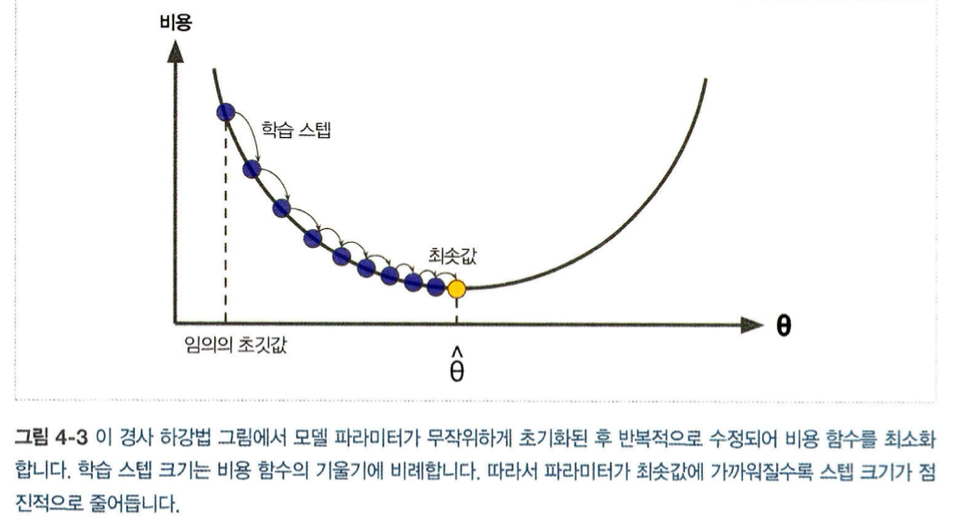

선형 회귀를 위한 MSE 비용 함수는 볼록함수. 지역 최솟값이 없고 전역 최솟값만 있음. 연속적이고 기울기가 가파르게 변하지 않음. ➡️ 경사하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장.

경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함.(사이킷런의 StandardScaler 활용.)

### 4.2.1 배치 경사 하강법
경사 하강법을 구현하려면, 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그레이디언트를 계산해야 함.

📈 4-5 비용 함수의 편도 함수

$\frac{d}{d\theta_j}MSE\theta = \frac{2}{m}\Sigma_{i=1}^{m}(\theta^TX^{(i)}-y^{(i)})X_j^{(i)} $


📈 4-6 비용 함수의 그레이디언트 벡터

$\nabla_\theta MSE(\theta)$ =
\begin{bmatrix}
\frac{\partial MSE(\theta)}{\partial \theta_1} \\
\frac{\partial MSE(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial MSE(\theta)}{\partial \theta_n}
\end{bmatrix}

📈 4-7 경사 하강법의 스텝

$\theta^{(next step)} = \theta - η\nabla_\theta MSE(\theta)$
* $\eta$ : 학습률

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta # 경사 하강법으로 찾은 것과 동일

array([[4.43466222],
       [3.03092823]])

In [ ]:
eta = 0.02 # 학습률이 너무 낮아 시간이 오래 걸림
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.42718697],
       [3.03702047]])

In [ ]:
eta = 0.5 # 학습률이 너무 높아 최적점에서 멀어짐. 발산.
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[-6.97346906e+118],
       [-8.55652869e+118]])

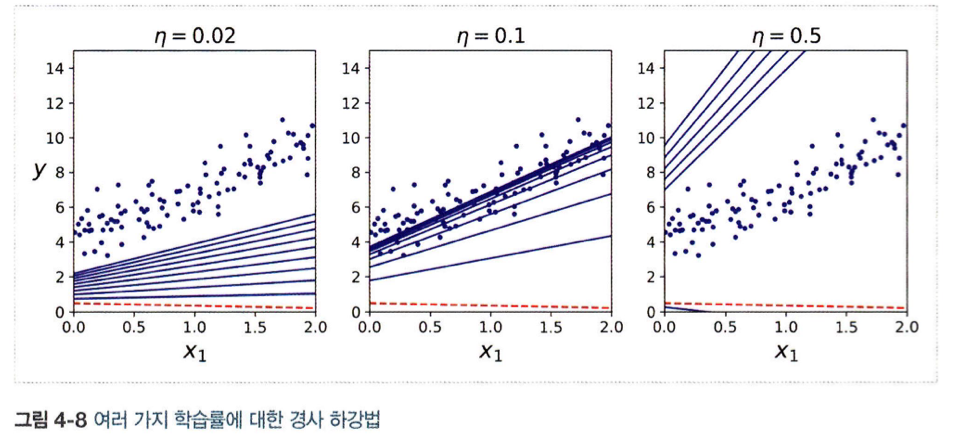

적절한 학습률: 그리드 탐색. (반복 횟수 제한과 같이 가야함.)

적절한 반복 횟수: 크게 지정하고 그레이디언트 벡터가 허용오차 $ε$보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지.

### 4.2.2 확률적 경사 하강법

배치 경사 하강법의 문제점 : 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산. (속도 단점)

확률적 경사 하강법 : 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산. (무작위에 따른 불안정성) ➡️ 학습률을 점진적으로 감소시킴.

* 학습 스케줄 : 매 반복에서 학습률을 결정하는 함수

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.42235944],
       [3.02952764]])

SGD 방식으로 선형 회귀.

한 에포크에서 tol = 1e-3 보다 적게 손실이 줄어들 때까지 실행.

기본 학습 스케쥴 사용 : 0.1

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.39625939]), array([3.01994014]))

### 4.2.3 미니배치 경사 하강법

각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라(확률적 경사 하강법) **미니배치**라 부르는 임의의 작은 샘플 세트에 대한 그레이디언트를 계산

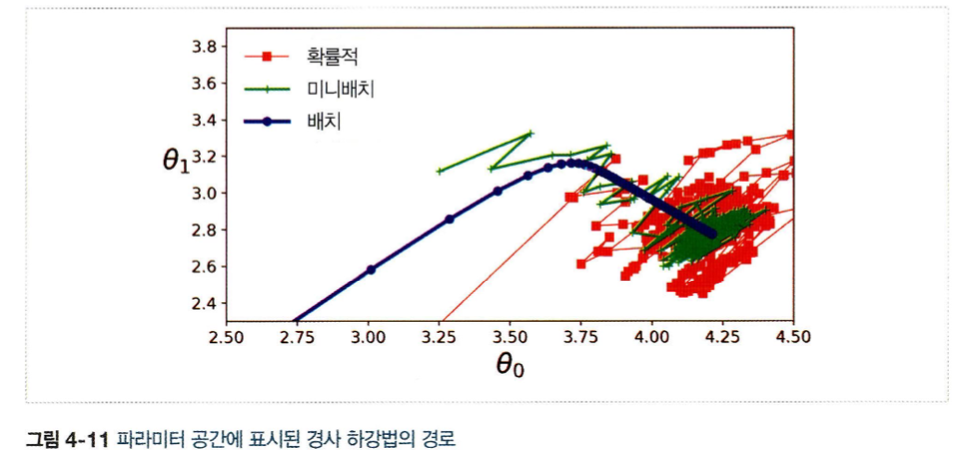

모두 최솟값에 도달
* 배치 경사 하강법 : 최솟값에서 멈춤. 속도 느림
* 확률적 경사 하강법과 미니배치 경사 하강법은 적절한 학습 스케줄을 사용하면 최솟값에 도달할 수 있음

정리

| 알고리즘 | m이 클 때 | 외부 메모리 학습 지원| n이 클 때 | 하이퍼파라미터 수 | 스케일 조정 필요 | 사이킷런 |
|--------|--------|--------|--------|--------|--------|--|
| 정규방정식   | 빠름   | No   | 느림|0|No|N\A|
| SVD   | 빠름   | No    |느림|0|No|LinearRegression|
| 배치 경사 하강법   | 느림   | No    |빠름|2|Yes|SGDRegressor|
| 확률적 경사 하강법   | 빠름  | Yes    |빠름|>=2|Yes|SGDRegressor|
| 미니배치 경사 하강법   | 빠름  | Yes  |빠름|>=2|Yes|SGDRegressor|

## 4.3 다항 회귀

* 선형 회귀 : 데이터의 관계가 **직선적(linear)**일 때 사용되는 회귀 분석 기법
* 비선형 회귀 : 데이터의 관계가 비선형적인 경우에 사용되는 회귀 분석 기법
* 다항 회귀 : 다항 회귀는 선형 회귀의 확장으로, 데이터를 비선형 관계로 모델링함.

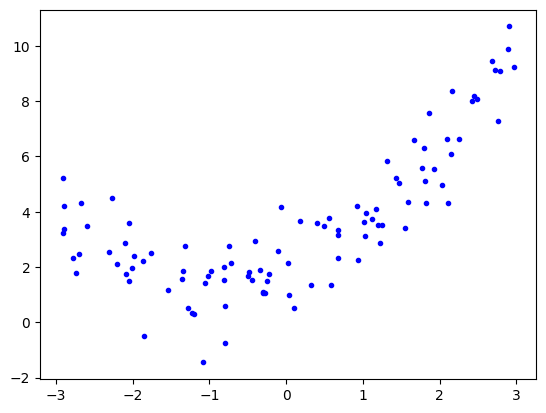

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, "b.")

직선은 이 데이터에 적합하지 않음 ➡️ 사이킷런에 있는 PolynomialFeatures를 사용해 훈련 데이터를 변환.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0],X_poly[0])

[-1.27556735] [-1.27556735  1.62707208]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04729047]), array([[1.01467472, 0.52827184]]))

<ipython-input-50-af60fe148997>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


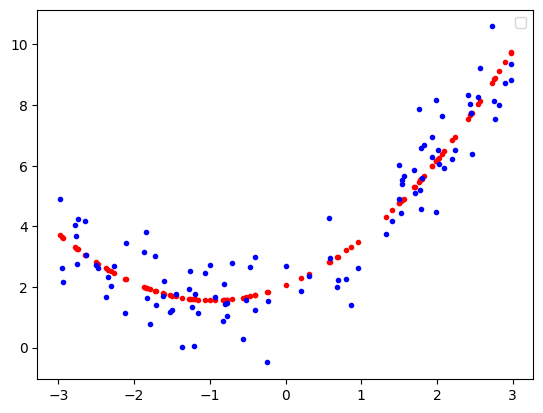

In [ ]:
# 시각화

plt.plot(X, lin_reg.predict(X_poly), "r.")
plt.legend()
plt.plot(X, y, 'b.')

PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문에 특성이 여러 개일 때 다항 회귀는 특성 간의 관계를 찾을 수 있음.

## 4.4 학습 곡선
모델의 일반화 성능을 추정하는 방법

1) 교차 검증 : 훈련 데이터 성능과 교차 검증 점수의 비교를 통해 과적합 여부 판별.

2) 학습 곡선 : 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄.

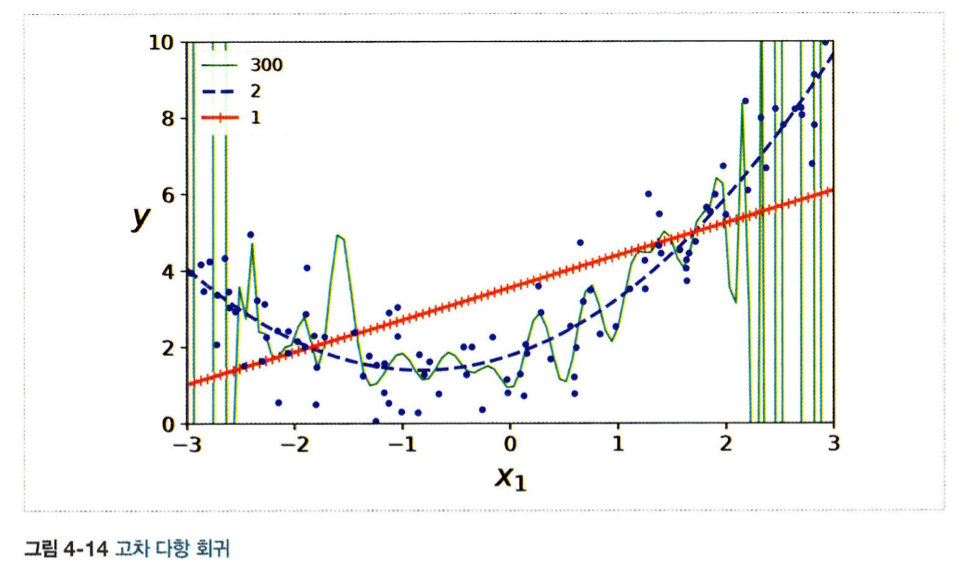

300차 다항 회귀는 과대적합 되어있고, 1차 선형 회귀는 과소적합 되어있음. 2차 다항회귀가 가장 잘 일반화됨.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train set')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='validation set')
  plt.legend()

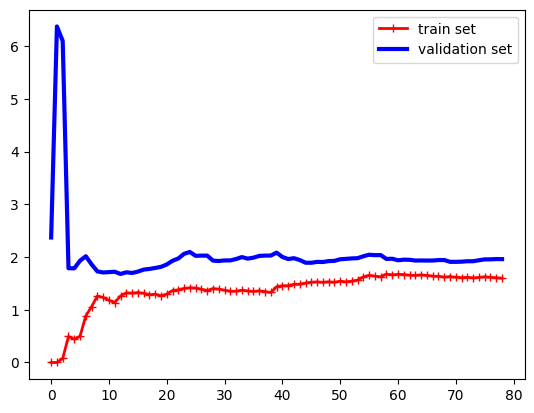

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

훈련 세트에 샘플이 추가되어도 오차가 작아지지 않음. 검증 세트에 샘플이 추가됨에 따라 검증 오차 감소.

두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음.

```
모델이 훈련 데이터에 과속적합되어 있다면, 훈련 셈플을 더 추가해도 효과가 없음. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택.
```

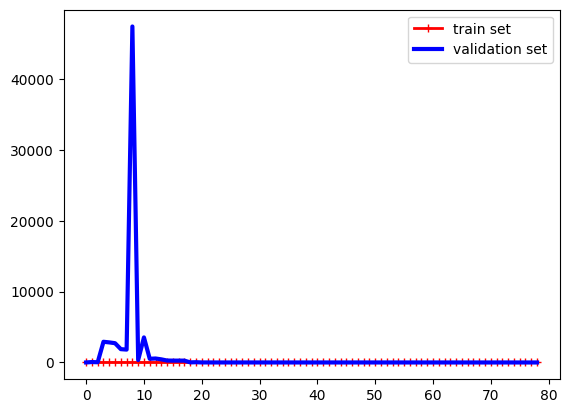

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_featues", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X,y)

다항 회귀 모델 훈련데이터의 오차가 선형 회귀모델보다 낫다.

```
과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때 까지 더 많은 데이터를 추가하는 것이다.
```

편향 / 분산 트레이드오프

모델의 일반화 오차는 다음 세 가지 합으로 표현될 수 있다.
* 편향: 잘못된 가정으로 인한 일반화 오차. 편향이 크면 과소적합 가능성 ⬆️
* 분산: 작은 변동에 민감한 정도. 분산이 높으면 과대적합 가능성 ⬆️
* 줄일 수 없는 오차: 데이터 자체의 잡음 때문에 발생. 잡음을 제거해야 오차를 줄일 수 있음

모델 복잡도 증가 : 분산 ⬆️ + 편향 ⬇️

모델 복잡도 감소 : 분산 ⬇️ + 편향 ⬆️